<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Computer Assignment 1</h4>
<h4 align="center">

Questions 1 & 3: [Ghazal Hosseini](https://t.me/GhLmu), Questions 2, 4, & 5: [Borna Khodabandeh](https://t.me/BornaKhodabandeh)

</h4>

<p>
    Write your code in the <span style="color: green;">Code Cell</span> and run the <span style="color: green;">Evaluation Cell</span> to check the output.<br>
    <span style="color: red; font-weight: bold;">Please refrain from editing the existing codes.</span>
</p>


In [16]:
Name = "Arvin Sheibani Farid"
Student_Number = "400101429"

### Importing necessary libraries

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: 2D transformation matrices ``(20 pt.)``
### 1.1 Implementing Geometric Transformations 

Create Python functions for 2D geometric transformations using transformation matrices: translation, rotation, scaling, and shearing. Each function should take a point and the transformation parameters as input and return the transformed point.

Translation: Shifts points by given x and y offset.


Rotation: Rotates points around the origin by a specified angle (in degrees).


Scaling: Scales points by given factors along the x and y axes.


Shearing: Shears points along the x or y axis by specified amounts. 

In [18]:
# Code cell
def scaling (input_vector, n):
    scaling_matrix = np.array([[n, 0], [0, n]])
    scaled_vector = np.dot(scaling_matrix, input_vector)
    return scaled_vector

def x_shearing (input_vector, n):
    shearing_matrix = np.array([[1, 0], [n, 1]])
    sheared_vector = np.dot(shearing_matrix, input_vector)
    return sheared_vector

def rotation (input_vector, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    rotating_vector = np.dot(rotation_matrix, input_vector)
    return rotating_vector

def translation (input_vector, translation_vector):
    translation_matrix = np.array([[1, translation_vector[0]/input_vector[1]], [translation_vector[1]/input_vector[0], 1]])
    translated_vector = np.dot(translation_matrix, input_vector)
    return translated_vector

### 1.2 Visualization 

Now, try to visualize three shapes or matrices after applying each of transformations on them using the functions you implemented. You can create plots to show the original shape and the transformed shapes after applying translation, rotation, scaling, and shearing.

Ensure you provide clear visualizations with appropriate labels and legends to distinguish between the original and transformed shapes.

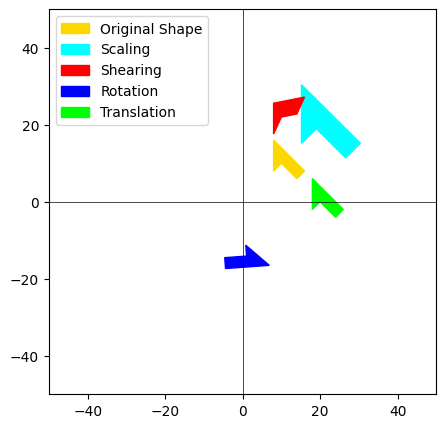

In [19]:
# Code cell
# Seting up the plane
plt.figure(figsize=(5, 5))
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


# Plotting a shape to perform translations on it
x = [8, 8, 16, 14, 10, 8]
y = [8, 16, 8, 6, 10, 8]
plt.fill(x, y, label='Original Shape', color='gold')

# Scaling 
scaling_index = 1.9
scaled_shape_x =[]
scaled_shape_y =[]

for i in range (6):
    point = np.array([x[i], y[i]])
    scaled_shape_x.append(scaling(point, scaling_index)[0]) 
    scaled_shape_y.append(scaling(point, scaling_index)[1])
plt.fill(scaled_shape_x, scaled_shape_y, label='Scaling', color='cyan')

# Shearing 
shearing_index = 1.2
sheared_shape_x =[]
sheared_shape_y =[]

for i in range (6):
    point = np.array([x[i], y[i]])
    sheared_shape_x.append(x_shearing(point, shearing_index)[0]) 
    sheared_shape_y.append(x_shearing(point, shearing_index)[1])
plt.fill(sheared_shape_x, sheared_shape_y, label='Shearing', color='red')

# Rotation
rotation_angle = 4
rotating_shape_x = []
rotating_shape_y = []

for i in range (6):
    point = np.array([x[i], y[i]])
    rotating_shape_x.append(rotation(point, rotation_angle)[0]) 
    rotating_shape_y.append(rotation(point, rotation_angle)[1])
plt.fill(rotating_shape_x, rotating_shape_y, label='Rotation', color='blue')

# Translation
translation_vector = np.array([10, -10])
translated_shape_x = []
translated_shape_y = []

for i in range (6):
    point = np.array([x[i], y[i]])
    translated_shape_x.append(translation(point, translation_vector)[0]) 
    translated_shape_y.append(translation(point, translation_vector)[1])
plt.fill(translated_shape_x, translated_shape_y, label='Translation', color='lime')

plt.legend()
plt.show()

### 1.3 QR Decomposition and Visualization (Bonus)

### QR Decomposition for 2x2 Matrices

For a 2x2 matrix $ A $, the QR decomposition expresses $ A $ as the product of two matrices: $ Q $ and $ R $.

1. **Orthogonal Matrix $ Q $ (Rotation Matrix):**
   - The matrix $ Q $ is orthogonal, meaning its transpose is equal to its inverse. For a 2x2 matrix, $ Q $ represents a rotation.
   - In simpler terms, $ Q $ captures the rotational aspect of the transformation.

2. **Upper Triangular Matrix $ R $ (Scaling and Shearing):**
   - The matrix $ R $ is upper triangular, containing scaling and shearing information.
   - The diagonal elements of $ R $ represent the scaling factors along the principal axes, and the off-diagonal elements introduce shearing effects.

in simple terms:

$$
    A = QR, \quad Q^TQ=I\\[1em]
    A=[a_1a_2]=QR=[q_1q_2]\begin{bmatrix}r_{11} & r_{12}\\0 & r_{22}\end{bmatrix}\\[1em]
    a_1 = r_{11}q_1, \quad a_2 = r_{12}q_1 + r_{22}q_2\\[1em]
    q_1^Tq_1 = q_2^Tq_2 = 1, \quad q_1^Tq_2 = 0
$$

#### QR Decomposition as a Geometric Transformation

Given a 2x2 matrix  $A$ , QR decomposition expresses $A$ as the product of an orthogonal matrix $Q$ (which is a rotation matrix) and an upper triangular matrix $R$. In this context, $Q$ represents a rotation, and $R$ includes scaling and additional shearing.

Consider following matrix and apply QR decomposition to it, and then visualize how the transformations done by $A$ is the same as first sheering and scaling with $R$ and then following this with a rotation $Q$.

$$
    A = \frac{1}{\sqrt{2}}\begin{bmatrix}
        1 & 1\\
        1 & 3
    \end{bmatrix}
$$

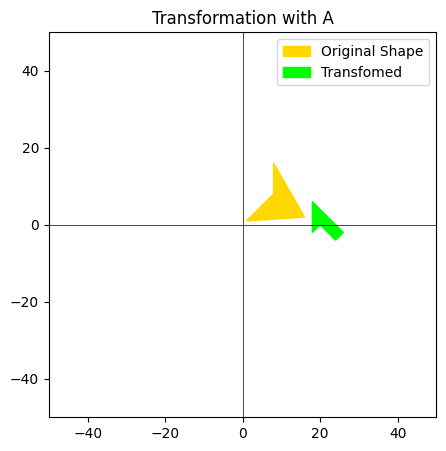

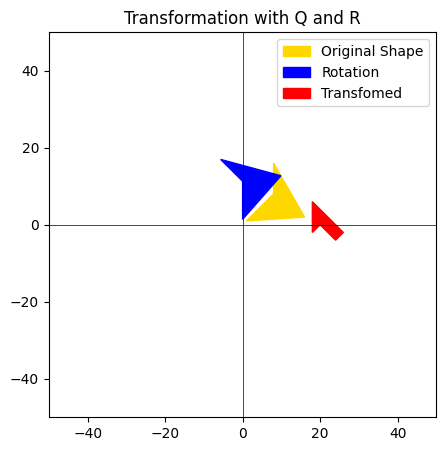

pedar


In [20]:
# Code cell

A = 1/np.sqrt(2)
B = 1
C = 1/np.sqrt(2)
D = 3 

def transformation_A (input_vector):
    global A,B,C,D
    transformation_matrix = np.array([[A, B], [C, D]])
    transformed_vector = np.dot(transformation_matrix, input_vector)
    return transformed_vector

def transformation_R (input_vector):
    global A,B,C,D
    transformation_matrix = np.array([[np.sqrt(A**2+C**2), (A*B+C*D)/np.sqrt(A**2+C**2)], [0, (A*B-C*D)/np.sqrt(A**2+C**2)]])
    transformed_vector = np.dot(transformation_matrix, input_vector)
    return transformed_vector

# Seting up the plane for transformation with A
plt.figure(figsize=(5, 5))
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.title('Transformation with A')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Plotting a shape to perform translations on it
x = [8, 8, 16, 1, 8]
y = [8, 16, 2, 1, 8]
plt.fill(x, y, label='Original Shape', color='gold')

transformed_shape_x = []
transformed_shape_y = []

for i in range (5):
    point = np.array([x[i], y[i]])
    transformed_shape_x.append(transformation_A(point)[0]) 
    transformed_shape_y.append(transformation_A(point)[1])
plt.fill(translated_shape_x, translated_shape_y, label='Transfomed', color='lime')

plt.legend()
plt.show()

# Seting up the plane for transformation with Q and R
plt.figure(figsize=(5, 5))
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.title('Transformation with Q and R')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.fill(x, y, label='Original Shape', color='gold')

# Rotation with Q
rotation_angle = np.arccos(A/np.sqrt(A**2+C**2))
rotating_shape_x = []
rotating_shape_y = []

for i in range (5):
    point = np.array([x[i], y[i]])
    rotating_shape_x.append(rotation(point, rotation_angle)[0]) 
    rotating_shape_y.append(rotation(point, rotation_angle)[1])
plt.fill(rotating_shape_x, rotating_shape_y, label='Rotation', color='blue')

# Scaling and Shearing with R

transformed_shape_x = []
transformed_shape_y = []

for i in range (5):
    point = np.array([rotating_shape_x[i], rotating_shape_y[i]])
    transformed_shape_x.append(transformation_R(point)[0]) 
    transformed_shape_y.append(transformation_R(point)[1])
plt.fill(translated_shape_x, translated_shape_y, label='Transfomed', color='red')

plt.legend()
plt.show()
print("pedar")


In [21]:
# Code cell
def GaussianElimination(A, print_results = True):
    A = A.astype(float)
    num_rows, num_cols = A.shape
    elementary = []
    rank = 1
    for i in range(num_rows-1):
        pivot = A[i, i]
        n = i + 1
        while (pivot==0 and n<num_rows):
            A[[i, n]] = A[[n, i]]
            n = n + 1
            pivot = A[i, i]
        # Eliminate the elements below the diagonal
        for j in range(i + 1, num_rows):
            if pivot!=0:
                factor = A[j, i]/pivot
                elem = np.zeros((num_rows, num_cols))
            for k in range(num_rows):
                elem[k, k] = 1
            elem[j, i] = -factor
            elementary.append(elem)
            A[j, :] = A[j, :] - factor * A[i, :]
        pivot_exists = 0
        for k in range (num_cols):
            if A[i+1, k] != 0:
                pivot_exists = pivot_exists + 1
        if pivot_exists != 0:
            rank = rank + 1
    ref = A
    if print_results:
        print (rank)
        print (ref)
        print (elementary)
    return rank, ref, elementary

In [22]:
# Evaluation Cell
import numpy as np

# Evaluation
# Generate a random matrix
n = np.random.randint(2, 6)
A = np.random.randint(-5, 5, size=(n, n))

# Perform Gaussian Elimination
rank, ref, elementary = GaussianElimination(A.copy(), print_results=True)

# Check the correctness of the results
assert rank == np.linalg.matrix_rank(A), "Rank calculation is incorrect"
assert np.allclose(np.triu(ref), ref), "The row echelon form is incorrect"

# Check if the elementary matrices multiply to the original matrix
reconstructed_ref = A.copy()
for elem_matrix in elementary:
    reconstructed_ref = np.dot(elem_matrix, reconstructed_ref)

assert np.allclose(ref, reconstructed_ref), "The reconstructed matrix does not match the original matrix"

print('status: successful')

3
[[-4.   -2.    1.  ]
 [ 0.    3.    0.  ]
 [ 0.    0.    1.75]]
[array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([[ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [-1.25,  0.  ,  1.  ]]), array([[ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. , -1.5,  1. ]])]
status: successful


## 2-2. LDU decomposition
In linear algebra, LU decomposition factors a matrix ($\textbf{A} :n \times n$) as the product of a lower triangular matrix ($\textbf{L} :n \times n$) and an upper triangular matrix ($\textbf{U} :n \times n$). The product sometimes includes a permutation matrix ($\textbf{P} :n \times n$) as well.
$$ \textbf{PA} = \textbf{LU} $$
We know that the elements on the main diagonal of the $\textbf{U}$ are the pivots. So $\textbf{U}$ can be decomposed into a diagonal matrix ($\textbf{D} :n \times n$) with elements whose pivots are on the main diagonal and a normalized $\textbf{U}$ matrix.
$$ \textbf{PA} = \textbf{LDU} $$

You are encouraged to leverage the Gaussian Elimination methods you've implemented in the previous question.

>Complete the function below.<br>
>Note that in this problem, we assume that the elimination process does not require any row permutation.<br>

In [23]:
# Code cell
def LDU_decomposition(A):
    rank, ref, elementary = GaussianElimination(A.copy(), print_results=False)
    num_rows, num_cols = A.shape
    Lower = np.identity(num_rows)
    Diag = np.zeros((num_rows, num_cols))
    for i in range (len(elementary)-1, -1, -1):
        for a in range (num_rows):
            for b in range (num_cols):
                if a!=b:
                    elementary[i][a, b] = elementary[i][a, b]*(-1)
        Lower = np.dot(elementary[i], Lower)
    for j in range (num_rows):
        Diag[j, j] = ref[j, j]
        ref[j, :] = ref[j, :] / ref[j, j]
    Upper = ref
    return Lower, Diag, Upper

        

In [24]:
# Evaluation Cell
n = np.random.randint(10,50)
A = np.random.randn(n, n)
L,D,U = LDU_decomposition(A.copy())

assert np.linalg.norm(L - np.tril(L)) < 1e-10, "L is not lower triangular"
assert np.linalg.norm(D - np.diag(np.diag(D))) < 1e-10, "D is not diagonal"
assert np.linalg.norm(U - np.triu(U)) < 1e-10, "U is not upper triangular"
assert np.linalg.norm(A - L @ D @ U) < 1e-10, "L and D and U does not satisfy A = LDU"

print('status: successful')

status: successful


### 2-3. Matrix Determinant and Matrix Inverse

#### 2-3-1. Matrix Determinant

The determinant of a square matrix is a scalar value that can be computed from its elements. For a 2x2 matrix:

$$
\text{det}\begin{bmatrix}
a & b\\
c & d
\end{bmatrix} = ad - bc
$$

And for a 3x3 matrix:

$$
\text{det}\begin{bmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{bmatrix} = a(ei - fh) - b(di - fg) + c(dh - eg)
$$

Write a function `det(matrix)` that takes a square matrix as input and returns its determinant. You are encouraged to leverage the Gaussian Elimination methods you've implemented in the previous question.

> then use `np.linalg.det` to check your answer 

#### 2-3-2. Matrix Inverse

The inverse of a square matrix $A$ is denoted as $A^{-1}$, and it satisfies the property that $A \cdot A^{-1} = I$, where $I$ is the identity matrix.

To find the inverse, you can use the Gaussian Elimination methods you've implemented. For a 2x2 matrix:

$$
A^{-1} = \frac{1}{ad - bc}\begin{bmatrix}
d & -b\\
-c & a
\end{bmatrix}
$$

And for a $n\times n$ matrix:

$$
A^{-1} = \frac{1}{\text{det}(A)} \text{adj}(A)
$$

Write a function `inv(matrix)` that takes a square matrix as input and returns its inverse if it exists. If the matrix is not invertible, print a message indicating that fact, and return `None`. Feel free to leverage the Gaussian Elimination methods you've implemented in the previous question.

> then use `np.linalg.inv` to check your answer 

In [25]:
# Code cell

def det(A):
    rank, ref, elementary = GaussianElimination(A.copy(), print_results=False)
    num_rows, num_cols = A.shape
    det = 1
    for i in range (num_rows):
        det = det * ref[i, i]
    return det   

def gauss_jordan_elimination(A):
    m, n = np.shape(A)
    B = np.hstack([A, np.identity(m)])
    
    for i in range(m):    
        for j in range(m):
            if i != j:
                ratio = B[j, i] / B[i, i]
                B[j, :] -= ratio * B[i, :]
    
    for i in range(m):
        B[i, :] /= B[i, i]

    return B[:, m:] 

def inv(A):
    if  det(A) == 0:
        print ("Matrix is not invertible")
        return None  
       
    return gauss_jordan_elimination(A)

In [26]:
# Evaluation Cell

# Test the determinant function
A_det = np.random.randint(1, 10, size=(3, 3))
det_A = det(A_det)
assert np.isclose(det_A, np.linalg.det(A_det)), "Determinant calculation is incorrect"

# Test the inverse function
A_inv = np.random.randint(1, 10, size=(3, 3))
inv_A = inv(A_inv)
assert np.allclose(inv_A @ A_inv, np.eye(3)), "Inverse calculation is incorrect"

print('status: successful')

status: successful


## Problem 3: Polyfit ``(25 pt.)``

###  3.1 System of linear equations

A system of linear equations (or linear system) is a finite collection of linear equations in a collection
of variables. For instance, a linear system of m equations in n variables $x_1 , x_2 , \dots, x_n$ can be written as

$$
\begin{cases}
    \begin{align*}
        a_{11}x_1+a_{12}x_2+\dots+a_{1n}x_n&=b_1\\
        a_{21}x_1+a_{22}x_2+\dots+a_{2n}x_n&=b_2\\
        &\vdots\\
        a_{m1}x_1+a_{m2}x_2+\dots+a_{mn}x_n&=b_m\\
    \end{align*}
\end{cases}
$$

A solution of the above linear system is a tuple $(s_1 , s_2 , \dots, s_n )$ of numbers that makes each equation a true
statement when the values $s_1, s_2 , \dots, s_n$ are substituted for $x_1 , x_2 , \dots, x_n$ respectively. The set of all solutions of
a linear system is called the solution set of the system.
Any system of linear equations has one of the following exclusive conclusions.

- No solution
- Unique solution
- Infinitely many solutions

you will be given the matrix $A$ and the vector $b$ as input, fill the function to do the following:

- If system is inconsistent it will print **”NO SOLUTION EXISTS !”** and return `None`
- If system is consistent and has unique solution, print **”UNIQUE SOLUTION EXISTS !”** and print
that solution in the next line, return the tuple $s$ in this case
- If system is consistent and has infinitely many solution, print **”MANY SOLUTIONS EXISTS !”** and print
one of the solutions in the next line, return one tuple $s$ in this case

In [27]:
# Code cell
def LinearSystemSolver(A, b, print_results = True):

    num_rows, num_cols = A.shape
    rank, ref, elementary = GaussianElimination(A.copy(), print_results=False)
    augmented_matrix = np.column_stack([A, b])
    rank_aug, ref_aug, elementary_aug = GaussianElimination(augmented_matrix.copy(), print_results=False)

    if print_results:
        if rank == num_rows:
            print("UNIQUE SOLUTION EXISTS!")
            s = np.dot(inv(A), b)
            return s
        elif rank_aug == num_rows:
            print("NO SOLUTION EXISTS!")
            return None
        elif rank_aug < num_rows:
            for i in range (num_rows):
                if ref[i, i] == 0:
                    ref[i, i] = 1 
            s = np.dot(inv(ref), b)
            print("MANY SOLUTIONS EXISTS!")
            return s

In [28]:
# Evaluation Cell

# Test case 1: No solution
A_no_solution = np.array([[2, 1], [4, 2]])
b_no_solution = np.array([5, 2])
assert LinearSystemSolver(A_no_solution, b_no_solution, print_results=True) is None, "No solution test failed"

# Test case 2: Unique solution
A_unique_solution = np.array([[1, 2], [3, 4]])
b_unique_solution = np.array([5, 11])
s_unique_solution = LinearSystemSolver(A_unique_solution, b_unique_solution, print_results=True)
expected_unique_solution = np.linalg.solve(A_unique_solution, b_unique_solution)
assert np.allclose(s_unique_solution, expected_unique_solution), "Unique solution test failed"

# Test case 3: Infinitely many solutions
A_many_solutions = np.array([[1, 2], [2, 4]])
b_many_solutions = np.array([3, 6])
s_many_solutions = LinearSystemSolver(A_many_solutions, b_many_solutions, print_results=True)

# Check if Ax = b
assert np.allclose(np.dot(A_many_solutions, s_many_solutions), b_many_solutions), "Infinitely many solutions test failed"

print('status: successful')

NO SOLUTION EXISTS!
UNIQUE SOLUTION EXISTS!
MANY SOLUTIONS EXISTS!
status: successful


###  3.2 Polynomial Curve Fitting

Consider this question : How to find a cubic polynomial that passes through each of these points $(1,3)$,$(2, -2)$ ,$(3, -5)$, and $(4, 0)$.

The form of cubic polynomial is 

\begin{align*}
y=a_0+a_1x+a_2x^2+a_3x^3
\end{align*}
We substitute all the points:

\begin{align*}
(x,y)=(1,3)\qquad&\longrightarrow\qquad a_0+3a_1+9a_2 +27a_3=2 \\
(x,y)=(2,-2)\qquad&\longrightarrow\qquad a_0+a_1+a_2+a_3=3\\
(x,y)=(3,-5)\qquad&\longrightarrow\qquad a_0-4a_1+16a_2-64a_3=2\\
(x,y)=(4,0)\qquad&\longrightarrow\qquad -a_0+2a_1+4a_2+8a_3=-2
\end{align*}

It turns to be a linear system.



Given a set of data points $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$ where $p(x_i) = y_i$, you are asked to write a function to find the coefficients of the polynomial using a linear solving system.

In this situation, you can use the method of polynomial interpolation to find the coefficients of the polynomial that passes through all the given data points. To do this, you will set up a system of linear equations by substituting the points into the polynomial equation and then solve for the coefficients of the polynomial.


In [29]:
# Code cell
def PolySolver(x, y, degree):
    A = np.zeros((degree+1, degree+1))
    for i in range (degree+1):
        for j in range (degree+1):
            A[i, j] = (x[i])**(j)
    coefficients = np.dot(inv(A),y)
    return coefficients

Now you should generate 3 set of random data points with varying sizes (4, 6, 8 points) and find the polynomial coefficients using your function. Additionally, compare the results with the coefficients obtained from the numpy.polyfit and visualize the fitted polynomial for each dataset.

In [30]:
# Code cell
x_1 =  np.random.randint(1, 11, size=4)
y_1 =  np.random.randint(1, 11, size=4)
calculated_coeeficients = PolySolver(x_1, y_1, 3)
assert np.allclose(calculated_coeeficients, np.flip(np.polyfit(x_1, y_1, deg=3))), "Coefficients are not matched"

x_2 =  np.random.randint(1, 11, size=6)
y_2 =  np.random.randint(1, 11, size=6)
calculated_coeeficients = PolySolver(x_2, y_2, 5)
assert np.allclose(calculated_coeeficients, np.flip(np.polyfit(x_2, y_2, deg=5))), "Coefficients are not matched"


x_3 =  np.random.randint(1, 11, size=8)
y_3 =  np.random.randint(1, 11, size=8)
calculated_coeeficients = PolySolver(x_1, y_1, 3)
assert np.allclose(calculated_coeeficients, np.flip(np.polyfit(x_3, y_3, deg=7))), "Coefficients are not matched"

print('status: successful')

Matrix is not invertible


TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

## Problem 4: Text retrieval ``(25 pt.)``


### 4-1. Word embeddings

As you know, computers are inherently non-understanding entities and strive to maintain their non-understanding nature. One of the examples of a computer's non-understanding is its inability to comprehend texts and similarities between them. The challenge lies in the fact that, to make a computer understand a text, we have no choice but to generate a vector representation of it. A common representation in computers for texts is using ASCII or UTF codes for character storage and employing a sequence of these codes for text storage. However, the issue with this representation is that it lacks any connection to the semantic meaning of words and sentences.

Now, we want to introduce a new representation for sentences. Suppose we have a collection of m sentences, each consisting of n distinct words. We will define the following two matrices based on the words and sentences.

![word embedding](https://corpling.hypotheses.org/files/2018/04/3dplot-768x586.jpg)

(a) **Word Frequency Matrix:**
   - Each word that is more frequently repeated in a sentence will likely play a more prominent role in the meaning of that sentence.
   - The word frequency matrix, denoted as $F$, is an $n \times m$ matrix, where its element $(i,j)$ represents the frequency of word j in sentence i.
   - For example, in the sentence bellow we have 6 words, and the word "desert" is repeated twice. Therefore, the frequency of this word in the sentence is $\frac{2}{6}$.
   > "I like eating dessert in the desert,"

   $$F_{ij}=\frac{|\{\text{repetitions of word j in sentence i}\}|}{|\{\text{words in sentence i}\}|}$$

(b) **Word Occurrence Matrix:**
   - Words that appear in more sentences probably have less specific meaning.
   - The occurrence matrix (or vector) of words is an n × 1 matrix, where its i-th element is equal to the logarithm of the ratio of the total number of sentences to the number of sentences containing the i-th word.
   - In mathematical terms, if $D$ is the set of all sentences, and $D_i$ is the subset of sentences that contain the i-th word, then the i-th element of the word occurrence matrix (denoted as I) is given by:
     $$
     I_i=\ln\left(\frac{D}{D_i}\right)
     $$
   - Now, the representation of the i-th sentence is obtained by multiplying the corresponding row of the word frequency matrix by the word occurrence matrix element-wise.

### Implementation

In this problem, we have a set $S$ containing a certain number of sentences. In the first step, you need to compute the representations of these sentences. Then, a query sentence is given, and its representation is calculated based on the previously computed representations of the sentences. Finally, you need to return the index of the most similar sentence in $S$ to the query, determined through the **cosine distance** determined by the angle between the vectors.

Before performing any of these steps, you should remove punctuation marks from the text. Also, consider case insensitivity.

write a function `query_sentence` that takes the set of sentences $S$ and the sentence $x$ and returns the closest match and it index.

you can do anything to improve performance, note that only the quality of the results matter.

*Example:*

$$
   S = \{
      \text{"This is the first document."},
      \text{"This document is the second document."},
      \text{"And that is the third one."}
      \}\\
   x = "\text{Is this the first document?}"\\
   \Rightarrow y = "\text{This is the first document.}"
$$

In [ ]:
# Code cell
def query_sentence(S, x):
    pass

In [ ]:
# Evaluation cell

S = [
    "This is the first document.",
    "This document is the second document.",
    "And that is the third one."
]
x = "Is this the first document?"

y, idx = query_sentence(S, x)

assert y == S[0]
assert idx == 0

print('status: successful')

In [ ]:
# Evaluation cell

test_set = [
    "Matrix multiplication is a fundamental operation in linear algebra.",
    "Eigenvalues and eigenvectors play a crucial role in matrix transformations.",
    "Linear independence is a key concept when dealing with vectors in a vector space.",
    "Solving systems of linear equations involves finding the values that satisfy multiple equations simultaneously.",
    "Determinants are useful for understanding the properties of square matrices.",
    "Row reduction, also known as Gaussian elimination, is a common technique in solving linear systems.",
    "The rank of a matrix provides insights into its dimensionality and properties.",
    "Orthogonal matrices have orthogonal columns and play a significant role in various applications.",
    "The singular value decomposition (SVD) is a powerful tool in linear algebra for analyzing and decomposing matrices.",
    "Linear transformations can be represented by matrices, and their properties can be studied algebraically.",
    "Vector spaces are fundamental structures in linear algebra, providing a framework for studying vectors and linear operations."
]

# Additional test sentence related to linear algebra
test_query = "Is the SVD a useful tool?"

# Test the query_sentence function
result, result_idx = query_sentence(test_set, test_query)
print(result)

### 4-2: Ferdousi's Poems (Bonus)

Now, let's proceed with the data from Ferdosi's poems. The content of the ferdosi.txt file consists of the poetic verses by Ferdosi. We'll read this file, split its content into individual sentences, and begin the process of analyzing and exploring the sentiments and structures within these classical Persian poems.

apply the techniques you developed earlier for this section, and given a sentence, give a couplet(`بیت`) from ferdousi that relates to it! 

In [ ]:
# Code cell

query = "آیا برنا توانا است؟"

## YOUR CODE
ans = ...

print(ans)

## Problem 5: Solving Circuits ``(30 pt.)``
As you might recall from your dreadful electric circuits II course, matrix methods are often used to solve electrical circuits. In this problem, we revisit these methods and explore their connections to image processing.

![circuit](circuit.png)

The **Conductance matrix** $G$, an $n\times n$ matrix, is defined as follows, where $R_{ij}$ is the resistance between nodes $(i,j)$:

$$
G_{ij}=\begin{cases}
    0 & \text{no resistor between nodes}\\
    g_{ij}=\frac{1}{R_{ij}}& i\neq j\\
    -d_i & i=j
\end{cases}\qquad ,d_i = \sum_{j} g_{ij}
$$

From Kirchhoff's Current Law, we have the relation:

$$
    Gv + I = 0
$$

where $I_i$ is the input current to node $i$ from outside the circuit, and $v_i$ is the voltage of node $i$. Finding the voltage of each node from the input currents is trivially represented by $v^* = G^{-1}I$. However, due to the properties of the matrix $G$, it has at most rank $n-1$, leading to potential cases with no solutions, can you explain why? (optional)

for example, ignoring the voltage source, find the Conductance matrix and voltages of the circuit in the picture above, what is the equivalent resistance between nodes 1 and 4?

> in all sections, use `np.linalg.pinv` for the calculation of matrix inverses

In [ ]:
# Code cell

import numpy as np
G = ...
I = ...

v = ...

to not leak the answer to this part and to securely check the answer to this problem, we used hashing.
you should not care about this result, however for correct evaluation, please round your answers for $v$ to 2 decimal points as in $0.1234 \to 0.12$, and present your answers for $I$ and $G$ in integer format as in $1.0\to1$

In [ ]:
# Evaluation Cell
import hashlib

G_str = ''.join(str(num) for num in G.flat)
I_str = ''.join(str(num) for num in I.flat)
v_str = ''.join(str(num) for num in v.flat)

G_hashed = '991df5e9987ccda662a13606bbb223881eb8a91fb95b06065f023b649e0cfaa6'
I_hashed = 'c624bb66d5279fe3f982df646c78b55cb5333937330ebc0d6cac9d4421dd9d6c'
v_hashed = '9ee47f8464419299d7a8d2dbec338ba6fe5a898e5473a75a0f839c0065b1374d'

assert hashlib.sha256(G_str.encode()).hexdigest() == G_hashed, "Matrix G is incorrect!"
assert hashlib.sha256(I_str.encode()).hexdigest() == I_hashed, "Vector I is incorrect!"
assert hashlib.sha256(v_str.encode()).hexdigest() == v_hashed, "Vector v is incorrect!"

print('status: successful')

status: successful


In [ ]:
# Example for how the evaluation works:

print('Correct type:')
x = np.array([-2, 0, 0, 2])
print("x:", x)
x_str = ''.join(str(num) for num in x.flat)
print("string format:", x_str)
x_hashed = hashlib.sha256(x_str.encode()).hexdigest()
print("hashed:", x_hashed)
print("Wrong type: ")
x = np.array([-2.0, 0.0, 0.0, 2.0])
print("x:", x)
x_str = ''.join(str(num) for num in x.flat)
print("string format:", x_str)
x_hashed = hashlib.sha256(x_str.encode()).hexdigest()
print("hashed:", x_hashed)

Correct type:
x: [-2  0  0  2]
string format: -2002
hashed: c624bb66d5279fe3f982df646c78b55cb5333937330ebc0d6cac9d4421dd9d6c
Wrong type: 
x: [-2.  0.  0.  2.]
string format: -2.00.00.02.0
hashed: 0408c7844b6ebf86b6627a3cd0740468694e98ddb1b707e7468978ae40672d4b



### 5-1. Problem Statement

In an electrical circuit, a set of nodes denoted as $B$ receives externally set voltage values, where $b=|B|$, and no external source is connected to the remaining nodes. Leveraging these externally set voltages, the goal is to determine the voltages on the other nodes in the circuit.

From Kirchhoff's Current Law, we have the relation:

$$
    \forall i\in V/B\quad v_i=\frac{1}{d_i}\sum_{j\neq i}G_{ji}v_j
$$

let $m$ be a vector that satisfies:
$$ m(i)=
\begin{cases}
      0, & \text{$v_i$ is set by an outside source}\\
      1, & o.w.\\
\end{cases} \qquad, M = diag(m)
$$

The matrix $\tilde{M}$ is defined as $M$ but with all-zero rows removed.

Additionally, the following relation can be found:

$$
    MGv + MI = 0 = MGv \Rightarrow \tilde{M}Gv=\tilde{G}v=0, \quad \tilde{G}\in\mathbb{R}^{(n-b)\times n}
$$

Now, separating the known voltages from the unknown voltages, denoting the unknown with $v_u$ and the known with $v_b$, the relation is given by:

$$
    \tilde{G}v=0=\sum_{i}\tilde{g}_iv_i=\sum_{i\in V/B}\tilde{g}_iv_i+\sum_{i\in B}\tilde{g}_iv_i=G_bv_b + G_uv_u=0\\
    G_b\in \mathbb{R}^{(n-b)\times b}, \quad G_u\in \mathbb{R}^{(n-b)\times(n-b)}\\
    G_uv_u=-G_bv_b\Rightarrow v_u = -G_u^{-1}G_bv_b\\
$$

Using these relations, write a function `find_voltage(m, vb, G)` which returns the total voltage vector $v$, given the vectors $m, v_b$ and the conductance matrix $G$.

In [ ]:
# Code cell
def find_voltage(m, vb, G):
    v = ...
    return v

In [ ]:
# Evaluation cell
G = np.matrix('-3 1 0 2; 1 -5 1 3; 0 1 -2 1; 2 3 1 -6')
m = np.array([0, 1, 1, 0]).T
vb = np.array([[-0.48, 0.24]]).T

v = find_voltage(m, vb, G)

assert np.linalg.norm(v - np.array([[-0.48, 0.08, 0.16, 0.24]]).T) < 1e-10, "wrong!"

### 5-2: from voltages to image processing (Bonus)

Forgetting about circuits, here we have created a method that can infer unknown values on nodes of a graph from known ones, by enforcing the KCL laws, which in a way are just a constraint on how *smoothly* the values change on this graph.

In this section, we explore the intriguing connection between electrical circuit concepts and image processing, specifically focusing on the process of image inpainting. Inpainting is a classical signal processing problem where the objective is to fill in missing values within a partially observed signal. The chosen context for this exploration is image processing, treating the image as a signal and modeling it as a 2D grid graph(circuit), being a grid of resistors.

Utilizing the OpenCV (cv2) package, load a grayscale version(single channel) of the image(`pic1.png`) with a resolution of 128 by 128.
Display the loaded image using matplotlib.pyplot, ensuring that the RGB image is converted to grayscale to reduce the color channels from three to one.

In [ ]:
# Code cell

Now flatten the image matrix to get the signal vector.
Then, construct the observation vector $m$ by randomly selecting indices to 1 or 0 with probability $p = 0.5$ and construct the vector $v_b$ as before, creating a vector of observed *voltages*.

In [ ]:
# Code cell

the underlying conductance matrix is given below, do not change this cell.

for those who might want to delve deeper, a Kings graph was used to model this specific problems geometry.
in this model all the resistances are set to 1, as we are assuming we know nothing about the underlying data besides casual relations between pixels, if we had more information, one might design specific circuits and conductance matrices fine tuned for their problem.

In [ ]:
# do not edit this cell 
N = 128
G1 = np.zeros((N, N))
np.fill_diagonal(G1[:-1, 1:], 1)
np.fill_diagonal(G1[1:, :-1], 1)
I = np.eye(N)
G2 = np.kron(I, G1) + np.kron(G1, I) + np.kron(G1, G1)
G = G2 - np.diag(G2.sum(axis=1))

Using the conductance matrix of the circuit, and the sections before, inpaint the lost values from the observed signal, and then display the original, observed and inpained image in a single plot.

In [ ]:
# Code cell